In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv(r'C:\Users\ZMZM\Desktop\Dataset\optiver-trading-at-the-close\train.csv')
df.head(5)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [3]:
df.shape

# over 5 millions rows
# 17 column

(5237980, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [5]:
df.isnull().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [6]:
# df['column'].fillna(df['column'].mean(), inplace=True)

In [7]:
# df.dropna(inplace=True) حذف جميع قيم النول تلقائيا

In [8]:
# df = df.dropna(how='all') خيار ممتاز لقيم النول

In [9]:
# df.drop(columns='date_id', axis=1 , inplace=True)

In [10]:
df.isnull().sum().sum()

# over 5 millions

5752930

In [11]:
first_df = (
    df.query('stock_id ==0 & date_id ==0')[['seconds_in_bucket','bid_price','ask_price', 'wap']].replace(0, np.nan)
    .set_index('seconds_in_bucket')
)

<Axes: title={'center': 'Stock 0 on Day 0 - How the order book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

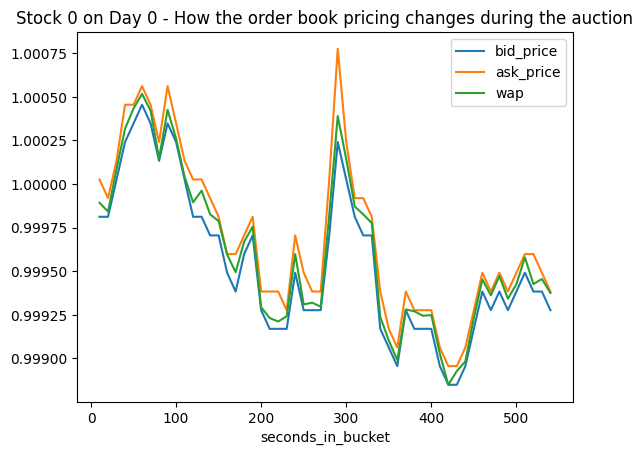

In [12]:
first_df.plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')

In [13]:
second_df = (
    df.query('stock_id ==0 & date_id ==0')[['seconds_in_bucket','near_price','far_price','reference_price']].replace(0, np.nan)
    .set_index('seconds_in_bucket')
)

<Axes: title={'center': 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

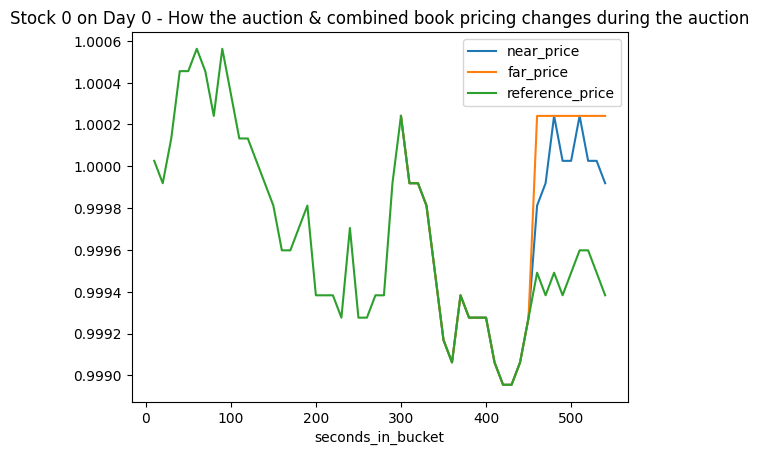

In [14]:
second_df.plot(title = 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')


In [15]:
third_df = (
    df.query('stock_id ==0 & date_id ==0')[['seconds_in_bucket','imbalance_size','matched_size']]
    .set_index('seconds_in_bucket')
)

<Axes: title={'center': 'Stock 0 on Day 0 - How the auction sizing changes during the auction period'}, xlabel='seconds_in_bucket'>

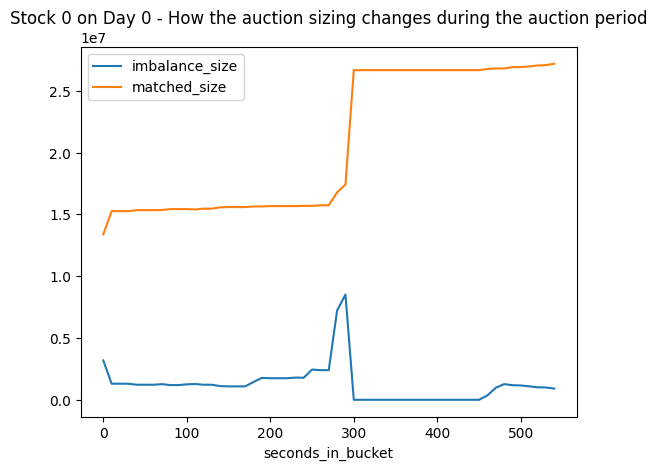

In [16]:
third_df.plot(title='Stock 0 on Day 0 - How the auction sizing changes during the auction period')

In [17]:
 simple_mapping = {1: 0.1, 0: 0, -1: -0.1} #changing the value

df['baseline_prediction'] = 0
df['simple_prediction'] = df['imbalance_buy_sell_flag'].map(simple_mapping)

In [18]:
baseline_mae = (df['baseline_prediction'] - df['target']).abs().mean()

simple_prediction_mae = (df['simple_prediction'] - df['target']).abs().mean()

print(baseline_mae, simple_prediction_mae)
print('MAE improvement in basis points: ', (baseline_mae-simple_prediction_mae))

6.40777074811524 6.407056596608261
MAE improvement in basis points:  0.000714151506978844
